# Importando bibliotecas

In [97]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
# Substituindo bibliotecas com erro de importação por implementação manual
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression

# Implementação manual de train_test_split
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state:
        np.random.seed(random_state)

    # Converte para numpy se for DataFrame/Series
    is_pandas_X = isinstance(X, (pd.DataFrame, pd.Series))
    is_pandas_y = isinstance(y, (pd.DataFrame, pd.Series))
    
    X_data = X.values if is_pandas_X else X
    y_data = y.values if is_pandas_y else y

    indices = np.arange(len(X_data))
    np.random.shuffle(indices)

    split_idx = int(len(X_data) * (1 - test_size))
    train_idx, test_idx = indices[:split_idx], indices[split_idx:]

    # Retorna no mesmo formato (DataFrame ou Array)
    if is_pandas_X:
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    else:
        X_train, X_test = X_data[train_idx], X_data[test_idx]

    if is_pandas_y:
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    else:
        y_train, y_test = y_data[train_idx], y_data[test_idx]

    return X_train, X_test, y_train, y_test

# Implementação manual de Regressão Logística
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, **kwargs):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Clip z to prevent overflow in np.exp
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        X_data = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
        y_data = y.values if isinstance(y, (pd.DataFrame, pd.Series)) else y

        n_samples, n_features = X_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent simples
        for _ in range(self.n_iterations):
            linear_model = np.dot(X_data, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X_data.T, (y_predicted - y_data))
            db = (1 / n_samples) * np.sum(y_predicted - y_data)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X_data = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
        linear_model = np.dot(X_data, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


In [ ]:
%%sql


In [98]:
# Importando base de dados que possui variaveis binárias para testar regressão logistica
df_curso = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','NO_CURSO','IN_AJUDA_DEFICIENTE','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])
df_curso_2 = df_curso.fillna(0)
df_curso_2.head()

,NU_ANO_CENSO,CO_IES,CO_UF,CO_MUNICIPIO,NO_CURSO,IN_AJUDA_DEFICIENTE,QT_MATRICULA_TOTAL,QT_CONCLUINTE_TOTAL
0,2019,1,51.0,5103403.0,DIREITO,1,447,75
1,2019,1,51.0,5103403.0,CIÊNCIAS ECONÔMICAS,0,323,28
2,2019,1,51.0,5103403.0,ENGENHARIA CIVIL,0,248,45
3,2019,1,51.0,5103403.0,PEDAGOGIA,1,331,53
4,2019,1,51.0,5103403.0,SERVIÇO SOCIAL,1,274,32


In [99]:
# Havia sido um teste com uma outra base de dados para talvez conseguir implementar arvores, mas infelizmente não consegui
#df_alunos = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', sep='|', encoding='latin-1', usecols=['IN_COMPLEMENTAR_ESTAGIO', 'TP_MODALIDADE_ENSINO', 'CO_UF_NASCIMENTO', 'IN_DEFICIENCIA', 'NU_DIA_NASCIMENTO', 'NU_IDADE', 'TP_SEMESTRE_REFERENCIA', 'TP_MOBILIDADE_ACADEMICA_INTERN', 'IN_BOLSA_MONITORIA', 'IN_COMPLEMENTAR_PESQUISA', 'IN_APOIO_BOLSA_TRABALHO', 'IN_APOIO_SOCIAL', 'CO_IES_DESTINO', 'IN_BOLSA_EXTENSAO', 'IN_BOLSA_PESQUISA', 'QT_CARGA_HORARIA_INTEG', 'IN_APOIO_TRANSPORTE', 'IN_COMPLEMENTAR_MONITORIA', 'IN_ATIVIDADE_EXTRACURRICULAR', 'TP_MOBILIDADE_ACADEMICA', 'TP_SEMESTRE_CONCLUSAO', 'TP_COR_RACA', 'IN_APOIO_MATERIAL_DIDATICO', 'TP_GRAU_ACADEMICO', 'QT_CARGA_HORARIA_TOTAL', 'IN_APOIO_BOLSA_PERMANENCIA', 'IN_COMPLEMENTAR_EXTENSAO', 'IN_MATRICULA', 'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_INGRESSO_VESTIBULAR', 'TP_TURNO', 'TP_SEXO', 'IN_MOBILIDADE_ACADEMICA', 'IN_APOIO_MORADIA', 'CO_PAIS_DESTINO', 'NU_MES_NASCIMENTO', 'TP_NACIONALIDADE', 'NU_ANO_CENSO', 'NU_ANO_NASCIMENTO', 'TP_NIVEL_ACADEMICO', 'IN_BOLSA_ESTAGIO', 'IN_CONCLUINTE', 'IN_ALUNO_PARFOR', 'IN_APOIO_ALIMENTACAO', 'CO_MUNICIPIO_NASCIMENTO'])
#df_alunos.head()
#'NU_ANO_CENSO','TP_TURNO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','TP_NIVEL_ACADEMICO','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','NU_MES_NASCIMENTO','NU_DIA_NASCIMENTO','NU_IDADE','TP_NACIONALIDADE','CO_UF_NASCIMENTO','CO_MUNICIPIO_NASCIMENTO','IN_DEFICIENCIA','QT_CARGA_HORARIA_TOTAL','QT_CARGA_HORARIA_INTEG','IN_INGRESSO_VESTIBULAR','IN_APOIO_SOCIAL','IN_APOIO_ALIMENTACAO','IN_APOIO_BOLSA_PERMANENCIA','IN_APOIO_BOLSA_TRABALHO','IN_APOIO_MATERIAL_DIDATICO','IN_APOIO_MORADIA','IN_APOIO_TRANSPORTE','IN_ATIVIDADE_EXTRACURRICULAR','IN_COMPLEMENTAR_ESTAGIO','IN_COMPLEMENTAR_EXTENSAO','IN_COMPLEMENTAR_MONITORIA','IN_COMPLEMENTAR_PESQUISA','IN_BOLSA_ESTAGIO','IN_BOLSA_EXTENSAO','IN_BOLSA_MONITORIA','IN_BOLSA_PESQUISA','TP_ESCOLA_CONCLUSAO_ENS_MEDIO','IN_ALUNO_PARFOR','TP_SEMESTRE_CONCLUSAO','TP_SEMESTRE_REFERENCIA','IN_MOBILidade_ACADEMICA','TP_MOBILIDADE_ACADEMICA','TP_MOBILIDADE_ACADEMICA_INTERN','CO_IES_DESTINO','CO_PAIS_DESTINO','IN_MATRICULA','IN_CONCLUINTE'

Preparando dados dos alunos com deficiência por ano

In [100]:
df_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2011.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2011['NU_ANO_CENSO'] = 2011

In [101]:
df_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2012.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2012['NU_ANO_CENSO'] = 2012

In [102]:
df_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2013.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2013['NU_ANO_CENSO'] = 2013

In [103]:
df_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2014.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2014['NU_ANO_CENSO'] = 2014

In [104]:
df_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2015.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2015['NU_ANO_CENSO'] = 2015

In [105]:
df_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2016.csv', usecols=['CO_ALUNO', 'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA', 'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO', 'IN_DEF_CEGUEIRA', 'IN_DEF_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2016['NU_ANO_CENSO'] = 2016

In [106]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2017.csv', usecols=['CO_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO_INFANTIL', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2017['NU_ANO_CENSO'] = 2017

In [107]:
df_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2018.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2018['NU_ANO_CENSO'] = 2018

In [108]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', usecols=['ID_ALUNO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA', 'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA', 'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA', 'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO', 'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT', 'IN_TGD_TRANSTOR_DESINTEGRATIVO'])
df_2019['NU_ANO_CENSO'] = 2019

In [109]:
df_regressao = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019])
df_regressao['QNT_DE_ALUNOS'] = 'NaN'
df_alunos_anos = df_regressao.groupby('NU_ANO_CENSO').agg({'QNT_DE_ALUNOS': ['count']}).reset_index()
df_alunos_anos.columns = ['ANO_CENSO', 'QNT_DE_ALUNOS']
df_alunos_anos

,ANO_CENSO,QNT_DE_ALUNOS
0,2011,29033
1,2012,34656
2,2013,37796
3,2014,45088
4,2015,51685
5,2016,49813
6,2017,52542
7,2018,59496
8,2019,66750


Preparando dados dos recursos e dos alunos concluintes por ano

In [110]:
recursos_e_concluintes_list = []

anos = range(2011, 2020)

colunas_recursos = ['IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA']
colunas_usadas = ['NU_ANO_CENSO','TP_SITUACAO','IN_AJUDA_DEFICIENTE','QT_CONCLUINTE_TOTAL'] + colunas_recursos

for ano in anos:
    df_curso = pd.read_csv(f'https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_{ano}.CSV', sep='|', encoding='latin-1', usecols=colunas_usadas)
    
    df_curso = df_curso.rename(columns={
        'NU_ANO_CENSO':'ANO_CENSO',
        'QT_CONCLUINTE_TOTAL':'NUM_ALUNOS_CONCLUINTES',
    })

    df_curso['RECURSOS'] = df_curso[colunas_recursos].sum(axis=1)
    
    recursos_ano = df_curso[['ANO_CENSO','RECURSOS', 'NUM_ALUNOS_CONCLUINTES']].groupby('ANO_CENSO').agg(['count'])
    recursos_e_concluintes_list.append(recursos_ano)

recursos_e_concluintes = pd.concat(recursos_e_concluintes_list)
recursos_e_concluintes.columns = ['RECURSOS', 'NUM_ALUNOS_CONCLUINTES']
recursos_e_concluintes = recursos_e_concluintes.reset_index()
recursos_e_concluintes

,ANO_CENSO,RECURSOS,NUM_ALUNOS_CONCLUINTES
0,2011,30746,30746
1,2012,32194,32194
2,2013,32382,32382
3,2014,33273,33273
4,2015,33873,33873
5,2016,34695,34695
6,2017,35693,35693
7,2018,38256,38256
8,2019,40709,40709


In [111]:
df_multipla = pd.merge(recursos_e_concluintes, df_alunos_anos, how = 'left', on = 'ANO_CENSO')
df_multipla

,ANO_CENSO,RECURSOS,NUM_ALUNOS_CONCLUINTES,QNT_DE_ALUNOS
0,2011,30746,30746,29033
1,2012,32194,32194,34656
2,2013,32382,32382,37796
3,2014,33273,33273,45088
4,2015,33873,33873,51685
5,2016,34695,34695,49813
6,2017,35693,35693,52542
7,2018,38256,38256,59496
8,2019,40709,40709,66750


# 1.1 Regressão multipla

In [112]:
#Importando bibliotecas
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
modelo = LinearRegression()
#definindo função para regressão inicial
def predicao(x, coef_angular, coef_linear):
  return int(coef_angular[0]*x + coef_linear)

Fazendo as previsões para os X's

In [113]:
#Fazendo regressão para a quantidade de recursos até 2030
y_recursos = df_multipla['RECURSOS'].values
x_recursos = df_multipla['ANO_CENSO'].values
x_recursos = x_recursos.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_recursos, y_recursos, test_size=0.3, random_state=29381)

modelo.fit(x_train, y_train)

y_predict = modelo.predict(x_test)
print(f'valor de R² = {round(metrics.r2_score(y_test, y_predict), 2)}')

coef_angular_recursos = modelo.coef_
coef_linear_recursos = modelo.intercept_

valor de R² = 0.6


In [114]:
#Fazendo regressão para quantidade de alunos até 2030
y_alunos = df_multipla['QNT_DE_ALUNOS'].values
x_alunos = df_multipla['ANO_CENSO'].values
x_alunos = x_alunos.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_alunos, y_alunos, test_size=0.3, random_state=29381)

modelo.fit(x_train, y_train)

y_predict = modelo.predict(x_test)
print(f'valor de R² = {round(metrics.r2_score(y_test, y_predict), 2)}')

coef_angular_alunos = modelo.coef_
coef_linear_alunos = modelo.intercept_

valor de R² = 0.89


In [115]:
a = []
for i in range(2020, 2031):
  a.append([i, predicao(i, coef_angular_recursos, coef_linear_recursos), predicao(i, coef_angular_alunos, coef_linear_alunos)])
df_testes = pd.DataFrame(data=a, columns=['ANO_CENSO', 'RECURSOS', 'QNT_DE_ALUNOS'])
b = df_testes.values
print(b)

[[  2020  41072  70602]
 [  2021  42305  75021]
 [  2022  43538  79439]
 [  2023  44770  83858]
 [  2024  46003  88277]
 [  2025  47236  92696]
 [  2026  48468  97114]
 [  2027  49701 101533]
 [  2028  50934 105952]
 [  2029  52167 110371]
 [  2030  53399 114789]]


Utilizando os dados obtidos em nossa regressão multipla

In [116]:
# Separando os dados em treino e teste
# Separando os dados transformados em X e y
X = df_multipla[['ANO_CENSO', 'RECURSOS','QNT_DE_ALUNOS']].values
y = df_multipla['NUM_ALUNOS_CONCLUINTES'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
# Treinando o modelo com os conjuntos de treino
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [117]:
#Obtendo coeficientes
print(lin_reg.coef_)

[-2.82892378e-04  9.99999920e-01  8.78617020e-08]


In [118]:
#Testando previsão
print(lin_reg.predict([[2029, 50393, 108829]]))

[50393.00025136]


In [119]:
def predicaomultipla(ano, recurso, alunos):
  return int(lin_reg.predict([[ano, recurso, alunos]]).item())

In [120]:
#Fazendo as previsões dos concluintes de 2020-2030
a = [[X[i][0], X[i][1], X[i][2], y[i]] for i in range(len(X))]
contador = 0
for i in range(2020, 2031): #adicionando a lista os anos futuros
  a.append([b[contador][0], b[contador][1], b[contador][2], predicaomultipla(i, b[contador][1], b[contador][2])])
  contador+= 1
df_final = pd.DataFrame(data=a, columns=['NU_ANO', 'RECURSOS', 'QNT_ALUNOS_TOTAL', 'CONCLUINTES'])
df_final

,NU_ANO,RECURSOS,QNT_ALUNOS_TOTAL,CONCLUINTES
0,2011,30746,29033,30746
1,2012,32194,34656,32194
2,2013,32382,37796,32382
3,2014,33273,45088,33273
4,2015,33873,51685,33873
5,2016,34695,49813,34695
6,2017,35693,52542,35693
7,2018,38256,59496,38256
8,2019,40709,66750,40709
9,2020,41072,70602,41072


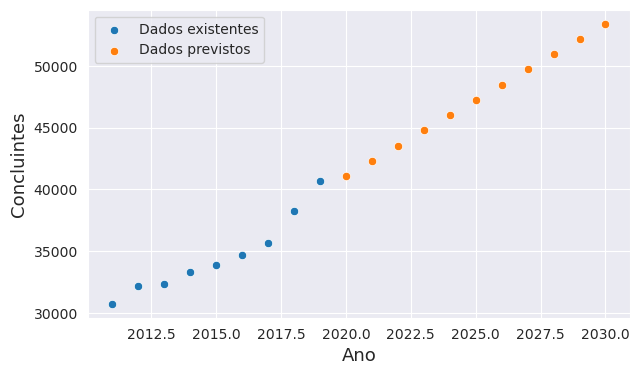

In [121]:
plt.figure(figsize =(7, 4))
sns.scatterplot(x='NU_ANO', y='CONCLUINTES', data=df_final.loc[0:8], label='Dados existentes')
sns.scatterplot(x='NU_ANO', y='CONCLUINTES', data=df_final.loc[9:19], label='Dados previstos')
plt.xlabel('Ano', fontsize = 13), plt.ylabel('Concluintes', fontsize = 13)
plt.legend()
plt.savefig('previsao.png', transparent = True)

# TESTES DE OUTROS MODELOS

# Testes regressão logistica

Text(0, 0.5, 'Concluintes')

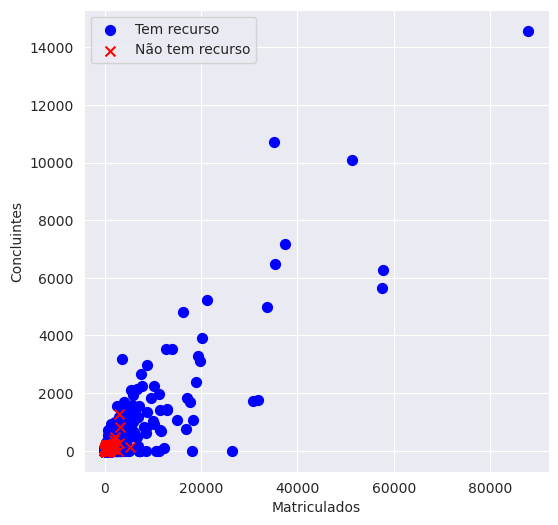

In [122]:
positive = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([1])]  
negative = df_curso_2[df_curso_2['IN_AJUDA_DEFICIENTE'].isin([0])]

fig, ax = plt.subplots(figsize=(6,6)) 
ax.scatter(positive['QT_MATRICULA_TOTAL'], positive['QT_CONCLUINTE_TOTAL'], s=50, c='b', marker='o', label='Tem recurso')  
ax.scatter(negative['QT_MATRICULA_TOTAL'], negative['QT_CONCLUINTE_TOTAL'], s=50, c='r', marker='x', label='Não tem recurso')  
ax.legend()  
ax.set_xlabel('Matriculados')  
ax.set_ylabel('Concluintes') 

In [123]:
X = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X = X.reshape(-1, 1)
y = df_curso_2['QT_CONCLUINTE_TOTAL'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [124]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#logit = LogisticRegression()

In [ ]:
#logit.fit(X_train, y_train)

In [125]:
X = df_curso_2[['QT_CONCLUINTE_TOTAL', 'QT_MATRICULA_TOTAL']].values
#X = X.reshape(-1, 1)
y = df_curso_2['IN_AJUDA_DEFICIENTE'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [126]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

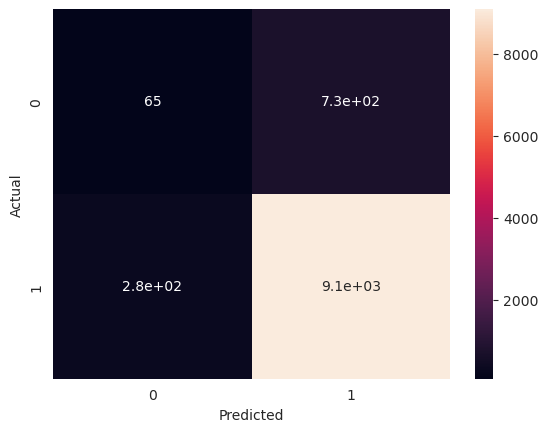

In [127]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [128]:
#Não faz o menor sentido aplicar regressão logistica com esses dados
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.9000786009039103


# Testes regressão polinomial


Text(0, 0.5, 'QNT_DE_ALUNOS')

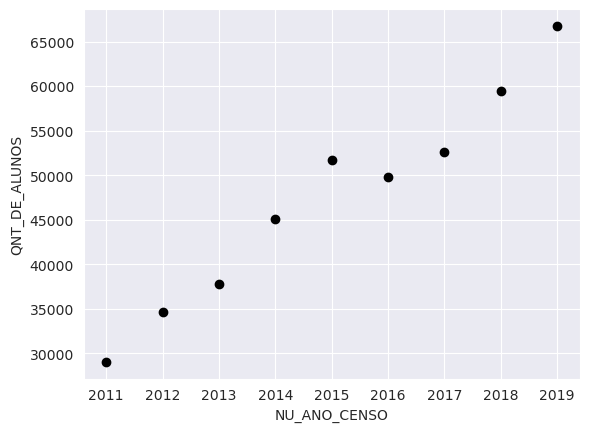

In [129]:
X = df_alunos_anos["ANO_CENSO"].values
x = X.reshape(-1, 1)
y = df_alunos_anos['QNT_DE_ALUNOS'].values
plt.scatter(X, y, c = "black")
plt.xlabel("NU_ANO_CENSO")
plt.ylabel("QNT_DE_ALUNOS")
# Gráficos para regressões polinomiais devem formar um tipo de "curva", muito provavelmente esses dados não irão servir

In [130]:
# Importando as funções para a regressão polimonial com sklearn para processar nossos dados
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
pre_process = PolynomialFeatures(degree=2)
# Transformando nosso x para 1, x e xˆ2
X_poly = pre_process.fit_transform(x)
X_poly

array([[1.000000e+00, 2.011000e+03, 4.044121e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.013000e+03, 4.052169e+06],
       [1.000000e+00, 2.014000e+03, 4.056196e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.017000e+03, 4.068289e+06],
       [1.000000e+00, 2.018000e+03, 4.072324e+06],
       [1.000000e+00, 2.019000e+03, 4.076361e+06]])

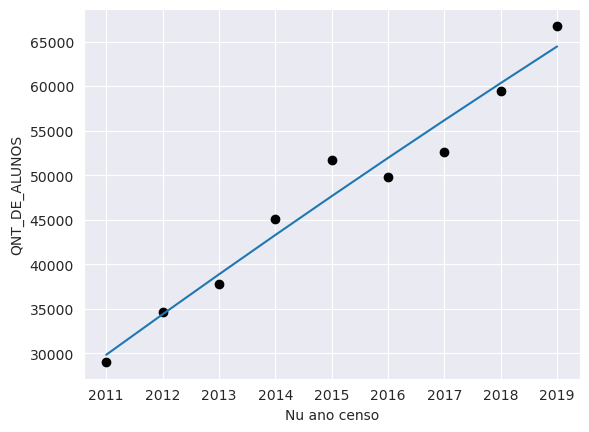

In [131]:
pr_model = LinearRegression()
pr_model.fit(X_poly, y)
y_pred = pr_model.predict(X_poly)
plt.scatter(x, y, c = "black")
plt.xlabel("Nu ano censo")
plt.ylabel("QNT_DE_ALUNOS")
plt.plot(X, y_pred)
#Os dados não servem para ser usados em uma regressão polinomial

In [132]:
theta0 = pr_model.intercept_
_ = pr_model.coef_
theta0

np.float64(-134928822.42240077)

# Testes Árvore de decisão

In [133]:
#Definindo X e Y
x = df_alunos_anos['ANO_CENSO'].values
X = x.reshape(-1, 1)
y = df_alunos_anos['QNT_DE_ALUNOS'].values

In [134]:
#Encaixando x e y no modelo de regressão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
regressor = DecisionTreeRegressor(random_state = 25000)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=25000)

In [135]:
Y_prediction = regressor.predict(X_test)
print(Y_prediction)

[49813. 37796. 49813.]


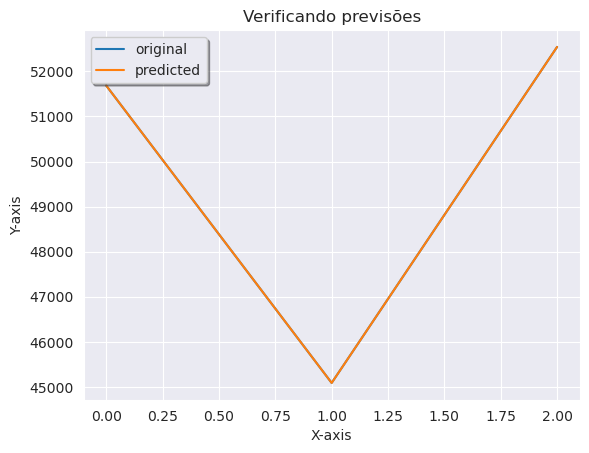

In [136]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_test, label="predicted")
plt.title("Verificando previsões")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()
#As previsões estão alinhadas com os dados

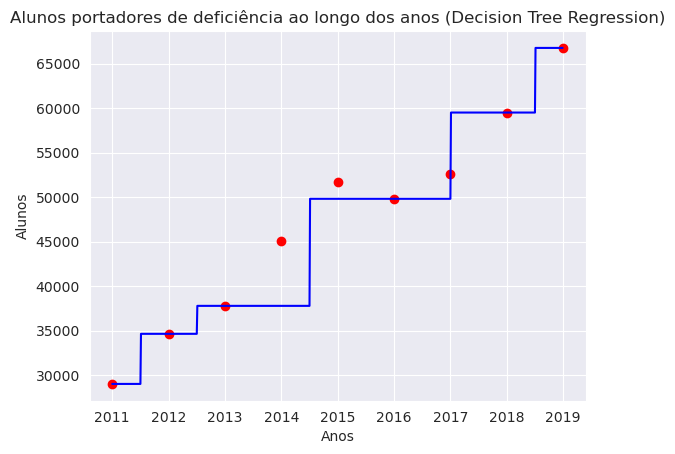

In [138]:
X_grid = np.arange(X.min(), X.max(), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Alunos portadores de deficiência ao longo dos anos (Decision Tree Regression)')
plt.xlabel('Anos')
plt.ylabel('Alunos')
plt.show()